<h1>BigMart Sales Prediction

<h3>Name - Deepak Wadge


<h3>Technocolabs Data-Scientist-Internship

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/col/technocolabs-mini-project/Big_mart_sale/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/col/technocolabs-mini-project/Big_mart_sale/Test.csv")

In [ ]:
print(train.shape, test.shape)

(8523, 12) (5681, 11)


In [ ]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<h1>Exploratory Data Analysis on train data

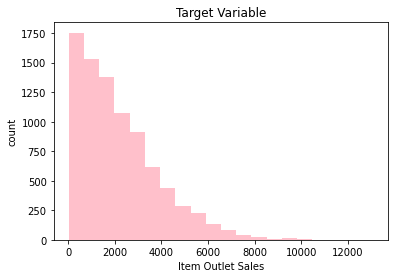

In [ ]:
plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

In [ ]:
# checking the columns of the data set

print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')


In [ ]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [ ]:
# checking the different items in Item Idemtifier

train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

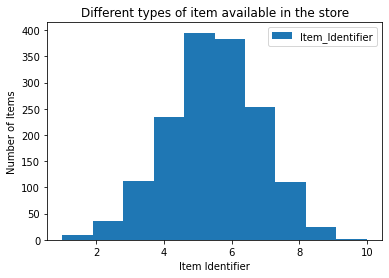

In [ ]:
# we will analyze only the training set

train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [ ]:
# checking the different items in Item Fat Content

train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

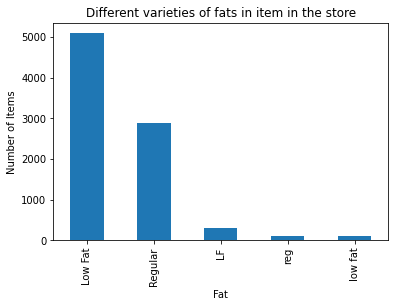

In [ ]:
# checking different varieties of item fat content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking the different items in Item Type

train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

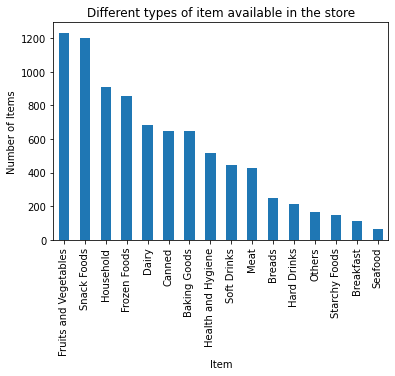

In [ ]:
# we will analyze only the training set
train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking the different types of Outlet Identifier

train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

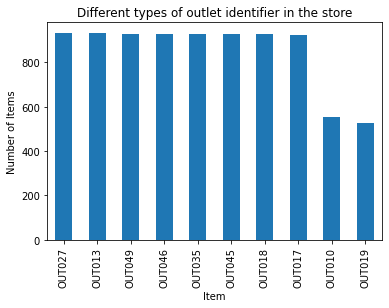

In [ ]:
# we will analyze only the training set

train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking the different types of Outlet Size

train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

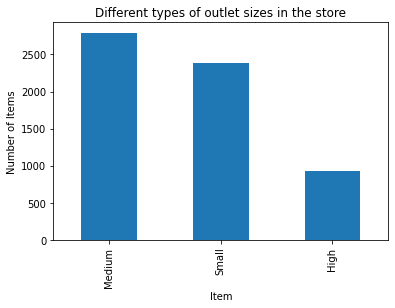

In [ ]:
# we will analyze only the training set

train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking different types of items in Outlet Location Type

train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

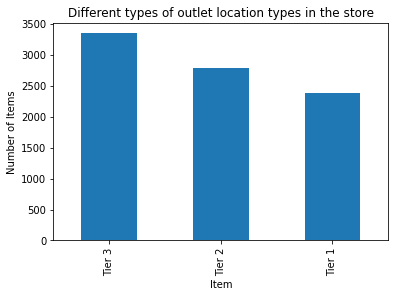

In [ ]:
# we will analyze only the training set

train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking different types of item in Outlet Type

train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

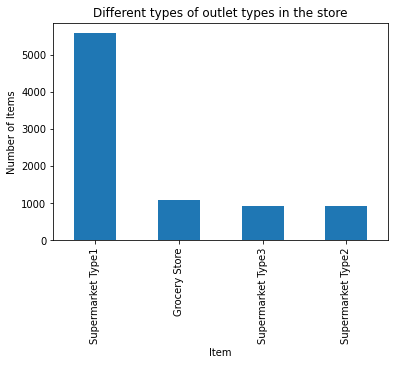

In [ ]:
# we will analyze only the training set

train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

<h1>Data pre processing

In [ ]:
# checking unique values in the columns of both train and test dataset

data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

Missing values

In [ ]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Item_Weight, Outlet_Size have missing values and On test data set have no column Item_Outlet_Sales , we combain test set and train set into one data set so it shows 5681 null values in test dataset



*   Medium    2793
*   Small     2388
*   High       932

On the Outlet_Size Medium size is more than other size so we fill NAN with **medium**

In [ ]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

Item_Weight dattype is numeric so we replace NALL value with **MEAN** of that column

In [ ]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

Item_Outlet_Sales datatype is numeric so we replace NALL value with MEAN of that column

In [ ]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [ ]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train




On Item_Fat_Content column the unique values are Low Fat, Regular, LF,        reg, low fat . Here we can see Low fat, LF and low fat are same so we replace these with Low fat .   Regular, reg are same so we replace these values with Regular. 

In [ ]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

create small values for establishment year by find the difference with current year


In [ ]:
data['Outlet_Years'] = 2022 - data['Outlet_Establishment_Year']

In [ ]:
data['Outlet_Years']

0        23
1        13
2        23
3        24
4        35
         ..
14199    25
14200    13
14201    20
14202    15
14203    20
Name: Outlet_Years, Length: 14204, dtype: int64

Item type combine wih Item_Identifier FD = Food,  NC = Non-Consumable, DR = Drinks


In [ ]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',  'NC':'Non-Consumable', 'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [ ]:
data.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Type_Combined
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23,Food
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13,Drinks
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23,Food
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24,Food
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,FDU04,12.792854,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656,train,37,Food
96,FDF41,12.150000,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300,train,23,Food
97,FDB56,8.750000,Regular,0.074613,Fruits and Vegetables,187.4556,OUT035,2004,Small,Tier 2,Supermarket Type1,3755.1120,train,18,Food
98,NCP18,12.792854,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532,train,37,Non-Consumable


<h1>Exploratory Data Analysis Outliers

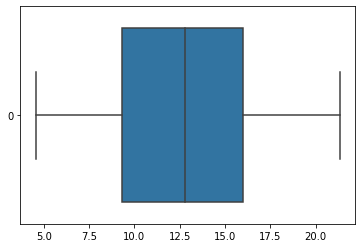

In [ ]:
sns.boxplot(data=data["Item_Weight"],orient="h")

<h1>Exploratory Data Analysis after Data preprocessing

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

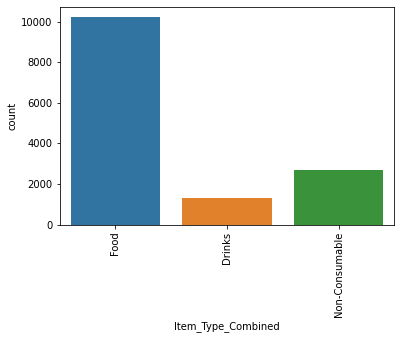

In [ ]:
sns.countplot(data['Item_Type_Combined'])
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

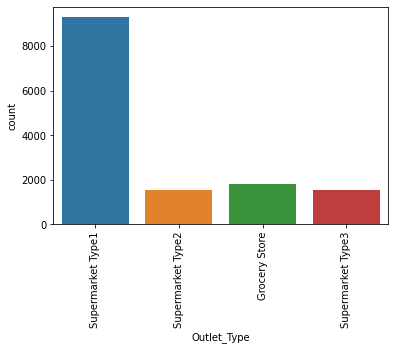

In [ ]:
sns.countplot(data['Outlet_Type'])
plt.xticks(rotation = 'vertical')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

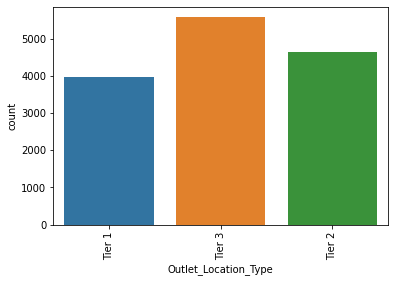

In [ ]:
sns.countplot(data['Outlet_Location_Type'])
plt.xticks(rotation = 'vertical')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

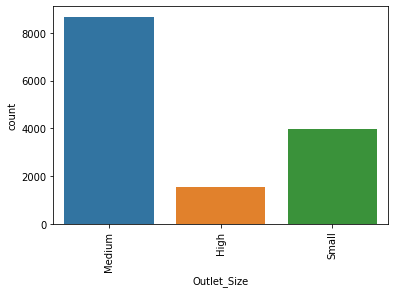

In [ ]:
sns.countplot(data['Outlet_Size'])
plt.xticks(rotation = 'vertical')

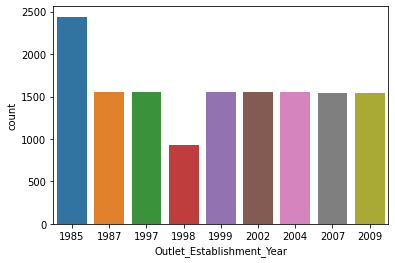

In [ ]:
sns.countplot(data['Outlet_Establishment_Year'])

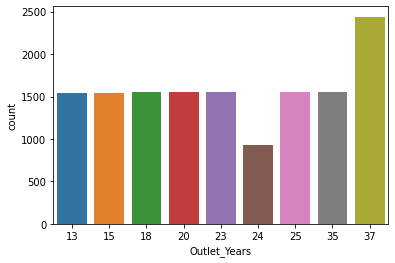

In [ ]:
sns.countplot(data['Outlet_Years'])

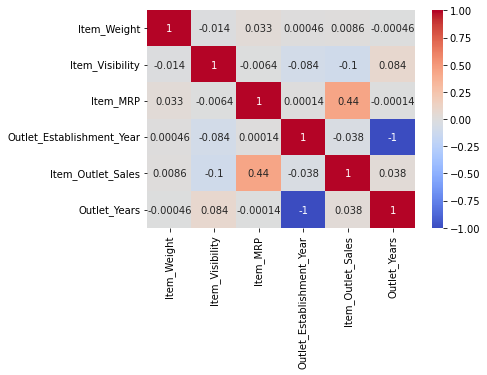

In [ ]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35,Non-Consumable


<h3>Converting Categorical To Numerical by using LabelEncoder and OneHot Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Outlet_Years',
       'Item_Type_Combined'],
      dtype='object')

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35,Non-Consumable


In [ ]:
cat_var=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type_Combined"]
for i in cat_var:
    data[i]=le.fit_transform(data[i])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,23,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,13,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,23,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,24,1
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,35,2


In [ ]:
data=pd.get_dummies(data,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type_Combined"])
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
dtype: object

In [ ]:
data.drop(["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Establishment_Year"],axis=1,inplace=True)

In [ ]:
train_df=data.loc[data["source"]=="train"]
test_df=data.loc[data["source"]=="test"]

In [ ]:
train_df.drop(["source"],axis=1,inplace=True)
test_df.drop(["source","Item_Outlet_Sales"],axis=1,inplace=True)

In [ ]:
train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,9.30,0.016047,249.8092,3735.1380,23,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,13,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,2097.2700,23,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,732.3800,24,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,994.7052,35,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [ ]:
test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
8523,20.750000,0.007565,107.8622,23,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
8524,8.300000,0.038428,87.3198,15,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
8525,14.600000,0.099575,241.7538,24,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
8526,7.315000,0.015388,155.0340,15,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
8527,12.792854,0.118599,234.2300,37,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0


In [ ]:
train_df.to_csv("/content/drive/MyDrive/col/technocolabs-mini-project/Big_mart_sale/train_modified.csv",index=False)
test_df.to_csv("/content/drive/MyDrive/col/technocolabs-mini-project/Big_mart_sale/test_modified.csv",index=False)

In [ ]:
train_data_mod=pd.read_csv("/content/drive/MyDrive/col/technocolabs-mini-project/Big_mart_sale/train_modified.csv")


In [ ]:
X = train_data_mod.drop(['Item_Outlet_Sales'], axis=1)
y = train_data_mod.Item_Outlet_Sales

<h2>Seperating Training And Test Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.2)

<h2>Model Building

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

<h2>Linear Regression

In [ ]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

# predicting the  test set results
y_pred = model1.predict(x_test)
print(y_pred)
print('R2 score',r2_score(y_test,y_pred))

[1313.68094755 2431.11738262 1350.85194475 ...  999.20339927 1566.33101138
 2416.28178705]
R2 score 0.5574560058340006


In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error:  824.6080366388975
Mean Squared Error:  1206093.7974640562
Root Mean Squared Error:  1098.2230180906136
Explained Variance Score:  0.5587118974598522


<h2>Ridge

In [ ]:
model2 = Ridge(alpha=10)

model2.fit(x_train,y_train)

y_pred_ridge = model2.predict(x_test)

print('R2 score',r2_score(y_test,y_pred_ridge))

R2 score 0.5574620410112303


In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred_ridge))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test, y_pred_ridge))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test, y_pred_ridge))

Mean Absolute Error:  824.1789371539451
Mean Squared Error:  1206077.3494048365
Root Mean Squared Error:  1098.2155295773396
Explained Variance Score:  0.558728919224202


<h2>Lasso

In [ ]:
model3 = Lasso(alpha=0.001)

model3.fit(x_train,y_train)

y_pred_lasso = model3.predict(x_test)

print('R2 score',r2_score(y_test,y_pred_lasso))

R2 score 0.5574570009009385


In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred_lasso))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test, y_pred_lasso))

Mean Absolute Error:  824.6063870696553
Mean Squared Error:  1206091.0855437098
Root Mean Squared Error:  1098.221783404295
Explained Variance Score:  0.5587128632102794


<h2>GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model4 = GradientBoostingRegressor()
model4.fit(x_train, y_train)

# predicting the test set results
y_predXG = model4.predict(x_test)
print(y_predXG)


[1442.86115129 2578.15792197 1292.98084552 ...  499.62766154 1710.38672801
 2433.79798022]


In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predXG))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test, y_predXG))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_predXG)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test, y_predXG))

Mean Absolute Error:  745.7247007128102
Mean Squared Error:  1103241.5829242058
Root Mean Squared Error:  1050.3530753628543
Explained Variance Score:  0.5963021164397739


<h2>Xgboost

In [ ]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=41,
                          max_depth=3,
                          min_child_weight=5,
                          gamma=0,
                          subsample=0.75,
                          colsample_bytree=0.95,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.021,
                          seed=42,
                          )
xg_reg.fit(x_train,y_train)

XGBRegressor(colsample_bytree=0.95, min_child_weight=5, n_estimators=41,
             nthread=4, objective='reg:squarederror', reg_alpha=0.021, seed=42,
             subsample=0.75)

In [ ]:
y_predregxs = xg_reg.predict(x_test)
print('R2 score',r2_score(y_test,y_predregxs))

R2 score 0.5985713602518457


In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predregxs))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test, y_predregxs))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_predregxs)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test, y_predregxs))

Mean Absolute Error:  741.0359418397644
Mean Squared Error:  1094039.4602735748
Root Mean Squared Error:  1045.963412492796
Explained Variance Score:  0.598819046628706


<h2>KFlold method in cross-validation on Xgboost



In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xg_reg, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.60


<h2>Save model with Xboost Model

In [ ]:
import pickle
#open a file, where you want to store the data
file = open('/content/drive/MyDrive/col/technocolabs-mini-project/Big_mart_sale/xg_model.pkl', 'wb')

# dump information to that file
pickle.dump(xg_reg, file)
file.close()

<h2>Read model

In [ ]:
with open("/content/drive/MyDrive/col/technocolabs-mini-project/Big_mart_sale/xg_model.pkl","rb") as file1:
   model=pickle.load(file1)

<h2> Predict with Test csv file

In [ ]:
test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
8523,20.750000,0.007565,107.8622,23,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
8524,8.300000,0.038428,87.3198,15,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
8525,14.600000,0.099575,241.7538,24,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
8526,7.315000,0.015388,155.0340,15,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
8527,12.792854,0.118599,234.2300,37,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0


In [ ]:
test_df['Item_Outlet_Sales'] = (model.predict(test_df)).tolist()

In [ ]:
test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Item_Outlet_Sales
8523,20.750000,0.007565,107.8622,23,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1653.696167
8524,8.300000,0.038428,87.3198,15,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1407.432861
8525,14.600000,0.099575,241.7538,24,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,740.201599
8526,7.315000,0.015388,155.0340,15,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,2487.593018
8527,12.792854,0.118599,234.2300,37,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,5614.777344


In [ ]:
#Save Output dataframe in csv file
test_df.to_csv("/content/drive/MyDrive/col/technocolabs-mini-project/Big_mart_sale/Test_Output.csv",index=False)

In [ ]:
from typing_extensions import Final
final=pd.concat([test["Item_Identifier"],test["Outlet_Identifier"],pd.DataFrame(test_df["Item_Outlet_Sales"].tolist(),columns=["Item_Outlet_Sales"])],axis=True)


In [ ]:
final.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1653.696167
1,FDW14,OUT017,1407.432861
2,NCN55,OUT010,740.201599
3,FDQ58,OUT017,2487.593018
4,FDY38,OUT027,5614.777344
